In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

%matplotlib inline

In [6]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [7]:
torch.manual_seed(10)

X     = torch.randn(4,100)
param = torch.tensor([3.,2.,-4.,7.]).view(1,-1)
b     = torch.tensor(12.)
e     = torch.randn(100).view(1,-1)
y     = (torch.mm(param,X)+b)+e

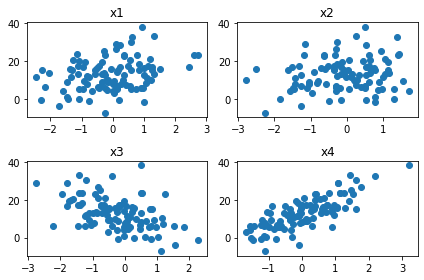

In [8]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(X.numpy()[0,:],y.numpy())
axs[0,0].set_title('x1')
axs[0,1].scatter(X.numpy()[1,:],y.numpy())
axs[0,1].set_title('x2')
axs[1,0].scatter(X.numpy()[2,:],y.numpy())
axs[1,0].set_title('x3')
axs[1,1].scatter(X.numpy()[3,:],y.numpy())
axs[1,1].set_title('x4')
fig.tight_layout()

Inicialización de del modelo

In [22]:
n_features = 4
n_data = 100

lr = 0.001
epochs = 10000

class ModLineal(nn.Module):
    def __init__(self,n_features,n_data):
        super(ModLineal,self).__init__()
        
        self.linear = nn.Linear(n_features, n_data)
        
    def forward(self,X):
        z = self.linear(X)
        return z
    
model = ModLineal(n_features, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

print(y.shape)

for i in range(1,epochs+1):
    
    loss = criterion(y_pred,y.T)
    if i%50 == 0:
        print(f'Loss for epoch {i} is: {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.Size([1, 100])
Loss for epoch 50 is: 182.68838500976562
Loss for epoch 100 is: 146.39918518066406
Loss for epoch 150 is: 117.57836151123047
Loss for epoch 200 is: 94.6567153930664
Loss for epoch 250 is: 76.39957427978516
Loss for epoch 300 is: 61.83457565307617
Loss for epoch 350 is: 50.19540023803711
Loss for epoch 400 is: 40.87763977050781
Loss for epoch 450 is: 33.40412521362305
Loss for epoch 500 is: 27.39781951904297
Loss for epoch 550 is: 22.56041717529297
Loss for epoch 600 is: 18.65582847595215
Loss for epoch 650 is: 15.496813774108887
Loss for epoch 700 is: 12.934762954711914
Loss for epoch 750 is: 10.851640701293945
Loss for epoch 800 is: 9.15343952178955
Loss for epoch 850 is: 7.7652812004089355
Loss for epoch 900 is: 6.627395153045654
Loss for epoch 950 is: 5.691973686218262
Loss for epoch 1000 is: 4.920773029327393
Loss for epoch 1050 is: 4.2830705642700195
Loss for epoch 1100 is: 3.7541861534118652
Loss for epoch 1150 is: 3.3142361640930176
Loss for epoch 1200 is: 2